In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
from scipy.integrate import odeint

In [2]:
def hohmann(r1, r2, M):
    return np.sqrt(G * M / r1) * (np.sqrt(2 * r2 / (r1 + r2)) - 1)
def visviva(M, r, a):
    return np.sqrt(G * M * ((2 / r) - (1 / a)))

G = 6.67e-11                                              #m^3 kg^-1 s^-2
m_probe, M_star, M_home, M_dest = 900, 2e30, 6e24, 1.9e27 #kg
a_initial, a_home = 7e6, 150e9                            #m
P_dest = 12 * 365 * 24 * 60**2                            #s
a_dest = np.cbrt(G * M_star * P_dest**2 / (4 * np.pi**2)) #K2L
v_initial = np.sqrt(G * M_home / a_initial)               #m/s
r_soi_home = a_home * (M_home / M_star)**(2 / 5)          #m
r_soi_dest = a_dest * (M_dest / M_star)**(2 / 5)          #m
v_esc = v_initial * np.sqrt(2)                            #m/s
v_home = np.sqrt(G * M_star / a_home)                     #m/s

dv_esc_soi, dv_esc, dv_dest = hohmann(a_initial, r_soi_home, M_home), v_esc - v_initial, hohmann(a_home, a_dest, M_star)
v_home_peri = v_initial + dv_esc + dv_dest
v_cruise_peri = v_home + dv_dest
e_depart = 2 * (v_home_peri / v_esc)**2 - 1
e_cruise = (a_dest - a_home) / (a_dest + a_home)
a_cruise = (a_home + a_dest) / 2
depart_angle = 2 * np.arccos(-1 / e_depart) / (2 * np.pi) * 360
a_depart = ((2 / a_initial) - v_home_peri**2 / (G * M_home))**(-1)
v_dest = visviva(M_star, a_dest, a_dest)
v_cruise_apo = visviva(M_star, a_dest, a_cruise)

print(f"Home planet semi-major: {a_home} m")
print(f"Home SOI: {r_soi_home} m")
print(f"Home planet velocity: {v_home} m/s")
print(f"Initial velocity: {v_initial} m/s (home frame)")
print(f"Home escape: {v_esc} m/s")
print(f"Delta v SOI: {dv_esc_soi} m/s")
print(f"Delta v escape: {dv_esc} m/s")
print(f"Destination semi-major: {a_dest} m")
print(f"Delta v to destination: {dv_dest} m/s")
print(f"Departure velocity: {v_home_peri} m/s")
print(f"Departure eccentricity: {e_depart}")
print(f"Departure semi-major: {a_depart} m")
print(f"Departure angle: {depart_angle / 2} deg, deflection {depart_angle} deg")
print(f"Cruise semi-major: {a_cruise} m")
print(f"Cruise eccentricity: {e_cruise}")
print(f"Cruise periapsis velocity: {v_cruise_peri} m/s")
print(f"Cruise apoapsis velocity: {v_cruise_apo} m/s")
print(f"Destination SOI: {r_soi_dest} m")
print(f"Destination velocity: {v_dest} m/s")

Home planet semi-major: 150000000000.0 m
Home SOI: 926701275.8511176 m
Home planet velocity: 29821.692328460056 m/s
Initial velocity: 7561.179046380834 m/s (home frame)
Home escape: 10693.12195492304 m/s
Delta v SOI: 3091.7840933473726 m/s
Delta v escape: 3131.942908542207 m/s
Destination semi-major: 785098111949.0576 m
Delta v to destination: 8822.181858755448 m/s
Departure velocity: 19515.30381367849 m/s
Departure eccentricity: 5.661493204850623
Departure semi-major: -1501664.743974311 m
Departure angle: 100.17363550698151 deg, deflection 200.34727101396302 deg
Cruise semi-major: 467549055974.5288 m
Cruise eccentricity: 0.6791780496971601
Cruise periapsis velocity: 38643.87418721551 m/s
Cruise apoapsis velocity: 7383.256996621647 m/s
Destination SOI: 48530344592.479164 m
Destination velocity: 13035.147455005796 m/s


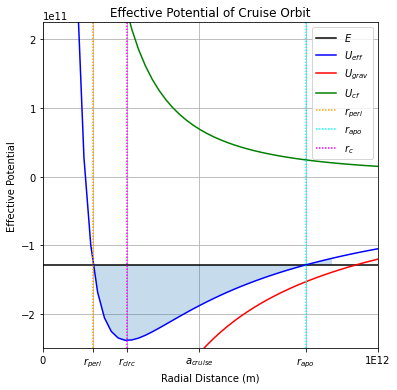

In [3]:
r = np.linspace(1, 1e12)
l = np.sqrt(G * M_star * m_probe**2 * (a_cruise) * (1 - e_cruise**2))
E = -G * m_probe * M_star / (2 * a_cruise)
rs = np.linspace(a_home, a_dest * 1.1)

def U_gravitational(r):
    return -G * M_star * m_probe / r
def U_centrifugal(r):
    return l**2 / (2 * 900 * r**2)
def U_effective(r):
    return U_gravitational(r) + U_centrifugal(r)
    
plt.figure(figsize=(6, 6))
ax = plt.axes()    
plt.axhline(E, c='k', label=r"$E$")
plt.plot(r, U_effective(r), c='b', label=r'$U_{eff}$')
plt.plot(r, U_gravitational(r), c='r', label=r'$U_{grav}$')
plt.plot(r, U_centrifugal(r), c='g', label=r'$U_{cf}$')
plt.axvline(a_home, dashes=(1, 1), c='orange', label=r"$r_{peri}$")
plt.axvline(a_dest, dashes=(1, 1), c='cyan', label=r"$r_{apo}$")
# plt.axvline(a_cruise, dashes=(1, 1), label=r"$a_{cruise}$")
plt.axvline(rs[U_effective(rs).argmin()], c='magenta', dashes=(1, 1), label=r"$r_c$")
plt.title(r"Effective Potential of Cruise Orbit")
plt.xlabel(r"Radial Distance (m)")
plt.ylabel(r"Effective Potential")
plt.grid()
plt.xlim(1, rs.max())
plt.ylim(-2.5e11, 2.25e11)
plt.fill_between(rs, np.zeros_like(rs) + E, U_effective(rs), alpha=.25)
plt.xticks([0, a_home, rs[U_effective(rs).argmin()], a_cruise, a_dest, 1e12], \
           [0, r"$r_{peri}$", r"$r_{circ}$", r"$a_{cruise}$", r"$r_{apo}$", "1E12"])
plt.legend(loc='upper right')
ax.set_axisbelow(True)
plt.show()

In [5]:
h = v_cruise_peri * a_home
soi = a_dest - np.arange(0, r_soi_dest + r_soi_dest / 20, r_soi_dest / 20)
varphi = np.arcsin(np.arange(0, r_soi_dest + r_soi_dest / 20, r_soi_dest / 20) / r_soi_dest) + np.pi
ecc_anom = np.arccos((1 - (soi / a_cruise)) / e_cruise)
vels = visviva(M_star, soi, a_cruise)
fpa = np.arccos(h / (soi * vels))
enc = pd.DataFrame([soi, varphi, ecc_anom, vels, fpa]).T.rename({0:'radius', 1:'varphi', 2:'e_anom', \
                                                                 3:'velocity', 4:'flight_path_angle'}, axis=1)
enc.at[12, "varphi"] = 3.785094
enc.at[0, 'e_anom'] = np.pi
enc['fpadeg'] = round(enc['flight_path_angle'] * 180 / np.pi, 1)
enc['e_anomdeg'] = round(enc['e_anom'] * 180 / np.pi, 1)
enc['t_anom'] = np.arccos((a_home * (1 + e_cruise) / enc['radius'] - 1) / e_cruise)
enc.at[0, 't_anom'] = np.pi
enc['t_anomdeg'] = round(enc['t_anom'] * 180 / np.pi, 1)
enc['psi'] = enc['t_anom'] - (np.pi / 2) - enc['flight_path_angle']
enc['psideg'] = round(enc['psi'] * 180 / np.pi, 1)
enc['rad'] = a_cruise * ((1 - e_cruise**2) / (1 + e_cruise * np.cos(enc['t_anom'])))
enc['vx'] = enc['velocity'] * np.sin(enc['psi'])
enc['vy'] = enc['velocity'] * np.cos(enc['psi'])
enc['vx_rel'] = v_dest - enc['vx']
enc['v_rel'] = np.sqrt(enc['vx_rel']**2 + enc['vy']**2)
enc['a'] = 1 / ((1 / r_soi_dest) - (enc['v_rel']**2 / (G * M_dest)))
enc['v_inf'] = np.sqrt(-G * M_dest / enc['a'])
enc

<ipython-input-5-0f5819f9c628>:6: RuntimeWarning: invalid value encountered in arccos
  fpa = np.arccos(h / (soi * vels))


,radius,varphi,e_anom,velocity,flight_path_angle,fpadeg,e_anomdeg,t_anom,t_anomdeg,psi,psideg,rad,vx,vy,vx_rel,v_rel,a,v_inf
0,7.850981e+11,3.141593,3.141593,7383.256997,NaN,NaN,180.0,3.141593,180.0,NaN,NaN,7.850981e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,7.826716e+11,3.191614,3.017890,7454.264515,0.113683,6.5,172.9,3.087466,176.9,1.402987,80.4,7.826716e+11,7349.554028,1245.036164,5685.593427,5820.316801,-4.053449e+09,5591.487441
2,7.802451e+11,3.241760,2.966539,7525.037420,0.159785,9.2,170.0,3.064918,175.6,1.334337,76.5,7.802451e+11,7315.641432,1762.832555,5719.506023,5985.008586,-3.816137e+09,5762.722612
3,7.778186e+11,3.292161,2.927059,7595.586306,0.194507,11.1,167.7,3.047528,174.6,1.282224,73.5,7.778186e+11,7281.517244,2161.582279,5753.630211,6146.275177,-3.603832e+09,5930.037326
4,7.753920e+11,3.342951,2.893711,7665.921408,0.223249,12.8,165.8,3.032792,173.8,1.238747,71.0,7.753920e+11,7247.179480,2498.947902,5787.967975,6304.388463,-3.412779e+09,6093.763864
5,7.729655e+11,3.394273,2.864274,7736.052621,0.248118,14.2,164.1,3.019744,173.0,1.200829,68.8,7.729655e+11,7212.626127,2797.236941,5822.521328,6459.588928,-3.239939e+09,6254.193253
6,7.705390e+11,3.446285,2.837609,7805.989520,0.270204,15.5,162.6,3.007887,172.3,1.166887,66.9,7.705390e+11,7177.855150,3067.876762,5857.292305,6612.090515,-3.082826e+09,6411.582107
7,7.681125e+11,3.499164,2.813040,7875.741373,0.290157,16.6,161.2,2.996928,171.7,1.135974,65.1,7.681125e+11,7142.864485,3317.648132,5892.282970,6762.084570,-2.939387e+09,6566.158075
8,7.656860e+11,3.553109,2.790126,7945.317163,0.308408,17.7,159.9,2.986675,171.1,1.107471,63.5,7.656860e+11,7107.652043,3550.964271,5927.495412,6909.743057,-2.807911e+09,6718.124236
9,7.632595e+11,3.608358,2.768563,8014.725601,0.325254,18.6,158.6,2.976995,170.6,1.080945,61.9,7.632595e+11,7072.215711,3770.887349,5962.931744,7055.221215,-2.686962e+09,6867.662668


In [6]:
def model_2BP(state, t):
    mu = G * 1e-9 * M_dest  # Gravitational parameter  [km^3/s^2]
    x, y, x_dot, y_dot = state
    x_ddot = -mu * x / (x**2 + y**2)**(3 / 2)
    y_ddot = -mu * y / (x**2 + y**2)**(3 / 2)
    return [x_dot, y_dot, x_ddot, y_ddot]

# For each encounter, record periapsis and time of periapsis
enc['r_peri'], enc['t_min'], enc['t_enc'], enc['v_peri'] = 0, 0, 0, 0
for line, data in enc.iterrows():
    # Initial Conditions
    varphi = data['varphi']
    X_0 = r_soi_dest * np.cos(varphi) * 1e-3  # [km]
    Y_0 = r_soi_dest * np.sin(varphi) * 1e-3  # [km]
    VX_0 = data['vx_rel'] * 1e-3  # [km/s]
    VY_0 = data['vy'] * 1e-3  # [km/s]
    state_0 = [X_0, Y_0, VX_0, VY_0]
    t = np.linspace(0, 95 * 24 * 3600, 500000)  # Simulate for 95 days (all periapses reached within 95 days)

    # Solving ODE
    sol = odeint(model_2BP, state_0, t)
    x_sat, y_sat, vx_sat, vy_sat = sol[:, 0] * 1e3, sol[:, 1] * 1e3, sol[:, 2] * 1e3, sol[:, 3] * 1e3
    r = np.sqrt(x_sat**2 + y_sat**2)
    enc.at[line, 'r_peri'] = r.min()
    enc.at[line, 't_min'] = t[r.argmin()]
    enc.at[line, 't_enc'] = 2 * t[r.argmin()]
    enc.at[line, 'v_peri'] = np.sqrt(vx_sat[r.argmin()]**2 + vy_sat[r.argmin()]**2)

enc['h_flyby'] = enc['r_peri'] * enc['v_peri']
enc['e_flyby'] = -enc['r_peri'] / enc['a'] + 1
enc['impact_param'] = -enc['a'] * np.sqrt(enc['e_flyby']**2 - 1)
enc['ext_angle'] = 2 * np.arccos(-1 / enc['e_flyby'])
enc

C:\Users\16084\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


,radius,varphi,e_anom,velocity,flight_path_angle,fpadeg,e_anomdeg,t_anom,t_anomdeg,psi,...,a,v_inf,r_peri,t_min,t_enc,v_peri,h_flyby,e_flyby,impact_param,ext_angle
0,7.850981e+11,3.141593,3.141593,7383.256997,NaN,NaN,180.0,3.141593,180.0,NaN,...,NaN,NaN,0,32,65,0,0,NaN,NaN,NaN
1,7.826716e+11,3.191614,3.017890,7454.264515,0.113683,6.5,172.9,3.087466,176.9,1.402987,...,-4.053449e+09,5591.487441,5333530245,7759891,15519783,8727,46545718448115,2.315800,8.466695e+09,4.034603
2,7.802451e+11,3.241760,2.966539,7525.037420,0.159785,9.2,170.0,3.064918,175.6,1.334337,...,-3.816137e+09,5762.722612,7025267941,7633865,15267731,8165,57361312738265,2.840937,1.014757e+10,3.860999
3,7.778186e+11,3.292161,2.927059,7595.586306,0.194507,11.1,167.7,3.047528,174.6,1.282224,...,-3.603832e+09,5930.037326,7622073902,7464928,14929856,8112,61830263493024,3.114991,1.063171e+10,3.795223
4,7.753920e+11,3.342951,2.893711,7665.921408,0.223249,12.8,165.8,3.032792,173.8,1.238747,...,-3.412779e+09,6093.763864,7605416237,7291607,14583215,8237,62645813544169,3.228511,1.047633e+10,3.771432
5,7.729655e+11,3.394273,2.864274,7736.052621,0.248118,14.2,164.1,3.019744,173.0,1.200829,...,-3.239939e+09,6254.193253,7173185805,7121127,14242254,8475,60792749697375,3.213988,9.896260e+09,3.774377
6,7.705390e+11,3.446285,2.837609,7805.989520,0.270204,15.5,162.6,3.007887,172.3,1.166887,...,-3.082826e+09,6411.582107,6428938425,6953027,13906054,8827,56748239477475,3.085404,8.998325e+09,3.801727
7,7.681125e+11,3.499164,2.813040,7875.741373,0.290157,16.6,161.2,2.996928,171.7,1.135974,...,-2.939387e+09,6566.158075,5435634362,6783958,13567916,9334,50736211134908,2.849241,7.842256e+09,3.858808
8,7.656860e+11,3.553109,2.790126,7945.317163,0.308408,17.7,159.9,2.986675,171.1,1.107471,...,-2.807911e+09,6718.124236,4238935083,6608733,13217467,10115,42876828364545,2.509640,6.463256e+09,3.961275
9,7.632595e+11,3.608358,2.768563,8014.725601,0.325254,18.6,158.6,2.976995,170.6,1.080945,...,-2.686962e+09,6867.662668,2885870941,6420014,12840029,11505,33201945176205,2.074027,4.882285e+09,4.147815


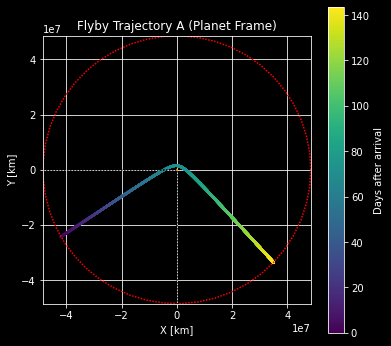

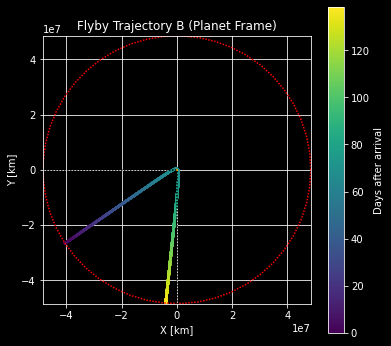

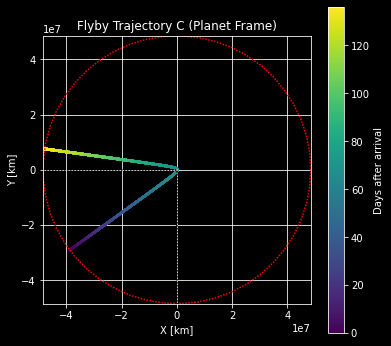

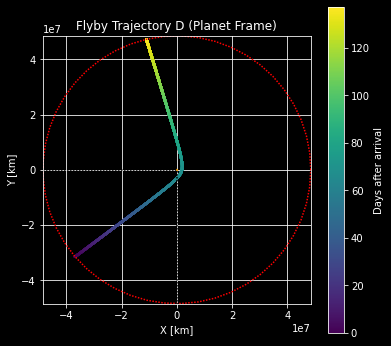

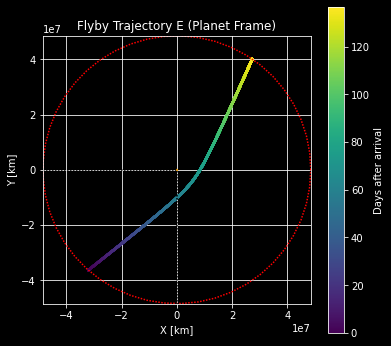

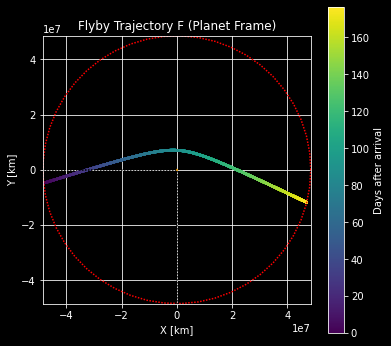

In [7]:
r_soi = r_soi_dest * 1e-3
def plot_encounter(line, letter, window):    
    # Solving ODE
    X_0 = r_soi * np.cos(enc.at[line, 'varphi'])  # [km]
    Y_0 = r_soi * np.sin(enc.at[line, 'varphi'])  # [km]
    VX_0 = enc.at[line, 'vx_rel'] * 1e-3          # [km/s]
    VY_0 = enc.at[line, 'vy'] * 1e-3              # [km/s]
    state_0 = [X_0, Y_0, VX_0, VY_0]
    t = np.linspace(0, enc.at[line, 't_enc'], 50000)  # Simulate for a time period matching the encounter duration
    sol = odeint(model_2BP, state_0, t)
    x_sat, y_sat, vx, vy = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]
    
    phi = np.linspace(0, 2 * np.pi)
    r_dest = 7e4  # Average radius of Jupiter [km]
    X_dest, X_soi = r_dest * np.cos(phi), r_soi * np.cos(phi)
    Y_dest, Y_soi = r_dest * np.sin(phi), r_soi * np.sin(phi)
    
    # Plotting destination and orbit
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes()
    ax.plot(X_soi, Y_soi, color='r', dashes=(1, 1))
    ax.scatter(x_sat, y_sat, c=t / (24 * 3600), s=2.5)
    p = ax.scatter(x_sat, y_sat, c=t / (24 * 3600), s=2.5)
    plt.title(f"Flyby Trajectory {letter} (Planet Frame)")
    ax.set_xlabel("X [km]")
    ax.set_ylabel("Y [km]")
    fig.colorbar(p, label="Days after arrival")
    
    ax.plot([-r_soi, 0, 0], [0, 0, -r_soi], dashes=(1, 1), c="k")
    ax.plot(X_dest, Y_dest, color='orange', alpha=0.7)
    planet_radius = 7e4
    x_planet = planet_radius * np.cos(np.linspace(-np.pi, np.pi))
    y_planet = planet_radius * np.sin(np.linspace(-np.pi, np.pi))
    ax.fill_between(x_planet, -y_planet, y_planet, color='orange')

    ax.set_xlim(-window, window)
    ax.set_ylim(-window, window)
    plt.gca().set_aspect('equal')
    ax.grid()
    ax.set_axisbelow(True)
    plt.show()

plot_encounter(10, "A",  r_soi)
plot_encounter(11, "B", r_soi)
plot_encounter(12, "C", r_soi)
plot_encounter(13, "D", r_soi)
plot_encounter(15, "E", r_soi)
plot_encounter(2, "F", r_soi)

plt.show()

In [8]:
flyby = enc[['varphi', 'ext_angle', 'r_peri', 'e_flyby', 'impact_param', \
             'a', 'v_peri', 't_min', 't_enc', 'v_inf', 'h_flyby']].copy()
flyby['ang_disp'] = flyby['t_enc'] / P_dest * (2 * np.pi)
# flyby['ang_depart']=flyby['varphi']-flyby['ext_angle']
flyby.loc[:11, 'ang_depart'] = flyby.loc[:11, 'varphi'] - flyby.loc[:11, 'ext_angle']
flyby.loc[12:, 'ang_depart'] = flyby.loc[12:, 'varphi'] + flyby.loc[12:, 'ext_angle'] - 2 * np.pi
flyby['v_hyper'] = np.sqrt(G * M_dest * ((2 / r_soi_dest) - (1 / enc['a'])))
flyby

,varphi,ext_angle,r_peri,e_flyby,impact_param,a,v_peri,t_min,t_enc,v_inf,h_flyby,ang_disp,ang_depart,v_hyper
0,3.141593,NaN,0,NaN,NaN,NaN,0,32,65,NaN,0,0.000001,NaN,NaN
1,3.191614,4.034603,5333530245,2.315800,8.466695e+09,-4.053449e+09,8727,7759891,15519783,5591.487441,46545718448115,0.257678,-0.842990,6040.483716
2,3.241760,3.860999,7025267941,2.840937,1.014757e+10,-3.816137e+09,8165,7633865,15267731,5762.722612,57361312738265,0.253493,-0.619239,6199.329289
3,3.292161,3.795223,7622073902,3.114991,1.063171e+10,-3.603832e+09,8112,7464928,14929856,5930.037326,61830263493024,0.247884,-0.503062,6355.159669
4,3.342951,3.771432,7605416237,3.228511,1.047633e+10,-3.412779e+09,8237,7291607,14583215,6093.763864,62645813544169,0.242128,-0.428482,6508.200194
5,3.394273,3.774377,7173185805,3.213988,9.896260e+09,-3.239939e+09,8475,7121127,14242254,6254.193253,60792749697375,0.236467,-0.380104,6658.651889
6,3.446285,3.801727,6428938425,3.085404,8.998325e+09,-3.082826e+09,8827,6953027,13906054,6411.582107,56748239477475,0.230885,-0.355442,6806.695001
7,3.499164,3.858808,5435634362,2.849241,7.842256e+09,-2.939387e+09,9334,6783958,13567916,6566.158075,50736211134908,0.225271,-0.359644,6952.491898
8,3.553109,3.961275,4238935083,2.509640,6.463256e+09,-2.807911e+09,10115,6608733,13217467,6718.124236,42876828364545,0.219452,-0.408165,7096.189469
9,3.608358,4.147815,2885870941,2.074027,4.882285e+09,-2.686962e+09,11505,6420014,12840029,6867.662668,33201945176205,0.213186,-0.539457,7237.921128


In [9]:
assist = flyby.loc[1:17, ['varphi', 'ang_depart', 'ang_disp', 'v_hyper']]
assist['x0'] = a_dest * np.cos(np.pi / 2) + r_soi_dest * np.cos(assist['varphi'])
assist['y0'] = a_dest * np.sin(np.pi / 2) + r_soi_dest * np.sin(assist['varphi'])
assist['px1'] = a_dest * np.cos(np.pi / 2 + assist['ang_disp'])
assist['py1'] = a_dest * np.sin(np.pi / 2 + assist['ang_disp'])
assist['ax1'] = r_soi_dest * np.cos(assist['ang_depart']) + assist['px1']
assist['ay1'] = r_soi_dest * np.sin(assist['ang_depart']) + assist['py1']
assist['vax'] = assist['v_hyper'] * np.sin(np.pi / 2 + assist['ang_depart'])
assist['vay'] = assist['v_hyper'] * np.cos(np.pi / 2 - assist['ang_depart'])
assist['vpx'] = v_dest * np.cos(np.pi + assist['ang_disp'])
assist['vpy'] = v_dest * np.sin(np.pi + assist['ang_disp'])
assist

,varphi,ang_depart,ang_disp,v_hyper,x0,y0,px1,py1,ax1,ay1,vax,vay,vpx,vpy
1,3.191614,-0.842990,0.257678,6040.483716,-4.846964e+10,7.826716e+11,-2.000713e+11,7.591775e+11,-1.677873e+11,7.229430e+11,4018.332045,-4510.038925,-12604.782483,-3321.825962
2,3.241760,-0.619239,0.253493,6199.329289,-4.828708e+10,7.802451e+11,-1.968925e+11,7.600081e+11,-1.573733e+11,7.318404e+11,5048.239403,-3598.188789,-12618.573484,-3269.047629
3,3.292161,-0.503062,0.247884,6355.159669,-4.798127e+10,7.778186e+11,-1.926260e+11,7.611007e+11,-1.501080e+11,7.377037e+11,5567.822988,-3063.886681,-12636.713568,-3198.208775
4,3.342951,-0.428482,0.242128,6508.200194,-4.754983e+10,7.753920e+11,-1.882424e+11,7.621967e+11,-1.440993e+11,7.420328e+11,5919.843071,-2704.094631,-12654.910997,-3125.427464
5,3.394273,-0.380104,0.236467,6658.651889,-4.698930e+10,7.729655e+11,-1.839246e+11,7.632502e+11,-1.388580e+11,7.452446e+11,6183.396902,-2470.475204,-12672.401314,-3053.737727
6,3.446285,-0.355442,0.230885,6806.695001,-4.629500e+10,7.705390e+11,-1.796613e+11,7.642649e+11,-1.341644e+11,7.473761e+11,6381.227700,-2368.761256,-12689.249758,-2982.953192
7,3.499164,-0.359644,0.225271,6952.491898,-4.546079e+10,7.681125e+11,-1.753677e+11,7.652615e+11,-1.299422e+11,7.481817e+11,6507.686678,-2446.866915,-12705.796518,-2911.666880
8,3.553109,-0.408165,0.219452,7096.189469,-4.447880e+10,7.656860e+11,-1.709120e+11,7.662690e+11,-1.263684e+11,7.470060e+11,6513.242071,-2816.661623,-12722.523100,-2837.688344
9,3.608358,-0.539457,0.213186,7237.921128,-4.333898e+10,7.632595e+11,-1.661068e+11,7.673250e+11,-1.244683e+11,7.423963e+11,6210.046045,-3717.906720,-12740.056059,-2757.905143
10,3.665191,-0.859042,0.206178,7377.808498,-4.202851e+10,7.608329e+11,-1.607257e+11,7.684701e+11,-1.290275e+11,7.317221e+11,4818.915518,-5586.601066,-12759.069079,-2668.562426


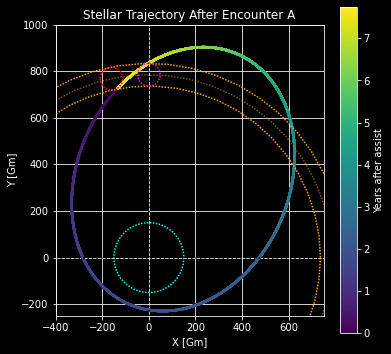

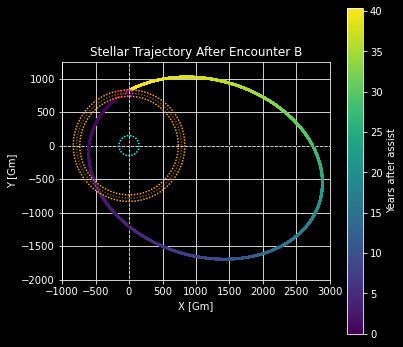

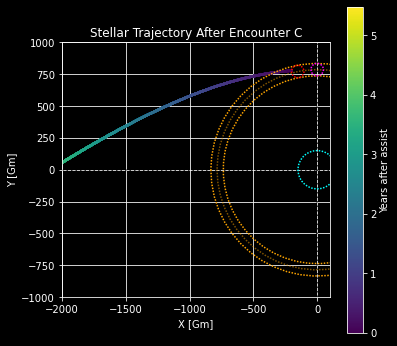

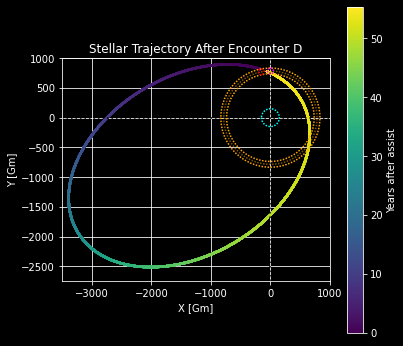

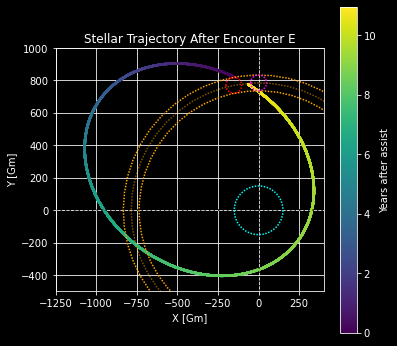

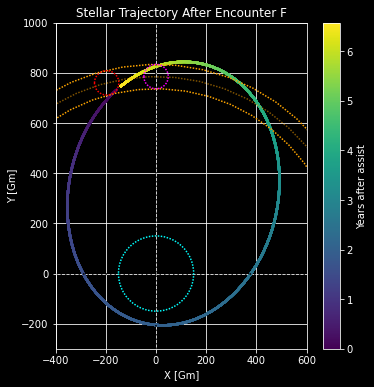

In [10]:
AU = 149597871000  # m

def model_2BP(state, t):
    mu = G * 1e-9 * M_star  # Gravitational parameter  [km^3/s^2]
    x, y, x_dot, y_dot = state
    x_ddot = -mu * x / (x**2 + y**2)**(3 / 2)
    y_ddot = -mu * y / (x**2 + y**2)**(3 / 2)
    return [x_dot, y_dot, x_ddot, y_ddot]

def plotline_sol(line, letter, lims=None, days=None):
    X_0 =  assist.at[line, 'ax1'] * 1e-3                             # [m-->km]
    Y_0 =  assist.at[line, 'ay1'] * 1e-3                             # [m-->km]
    VX_0 = (assist.at[line, 'vax'] + assist.at[line, 'vpx']) * 1e-3  # [m/s-->km/s]
    VY_0 = (assist.at[line, 'vay'] + assist.at[line, 'vpy']) * 1e-3  # [m/s-->km/s]
    state_0 = [X_0, Y_0, VX_0, VY_0]
    t = np.linspace(0, days * 24 * 3600, 75000) if not days==None else np.linspace(0, 1e3 * 24 * 3600, 100000)  # Simulate for a time period of 100 d

    # Solving ODE
    sol = odeint(model_2BP, state_0, t)
    x_sat, y_sat = sol[:, 0] * 1e3, sol[:, 1] * 1e3 # m
    vx, vy = sol[:, 2] * 1e3, sol[:, 3] * 1e3       # m/s
        
    # Create plot
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes()
        
    plt.axvline(0, c='k', dashes=(1, 2))
    plt.axhline(0, c='k', dashes=(1, 2))
    
    # Draw planet orbits and destination SOI bounds
    colors = ['orange', 'orange', 'orange', 'cyan']
    alphas = [.5, 1, 1, 1]
    for i, radius in enumerate([a_dest, r_soi_dest + a_dest, r_soi_dest - a_dest, a_home]):
        x_orbit = radius * np.cos(np.linspace(-np.pi, np.pi))
        y_orbit = radius * np.sin(np.linspace(-np.pi, np.pi))
        ax.plot(x_orbit * 1e-9, y_orbit * 1e-9, color=colors[i], alpha=alphas[i], dashes=(1, 1))
    
    # Draw initial SOI position
    x_soi = r_soi_dest * np.cos(np.linspace(-np.pi, np.pi)) + assist.at[line, 'px1']
    y_soi = r_soi_dest * np.sin(np.linspace(-np.pi, np.pi)) + assist.at[line, 'py1']
    ax.plot(x_soi * 1e-9, y_soi * 1e-9, color='r', dashes=(1, 1))

    # Draw departing SOI position
    x_soi = r_soi_dest * np.cos(np.linspace(-np.pi, np.pi))
    y_soi = r_soi_dest * np.sin(np.linspace(-np.pi, np.pi)) + a_dest
    ax.plot(x_soi * 1e-9, y_soi * 1e-9, color='magenta', dashes=(1, 1)) 
    
    # Plot predicted trajectory
    ax.scatter(x_sat * 1e-9, y_sat * 1e-9, c=t / (24 * 3600 * 365), s=2)
    p = ax.scatter(x_sat * 1e-9, y_sat * 1e-9, c=t / (24 * 3600 * 365), s=2)
    fig.colorbar(p, label='Years after assist')

    # Labels
    plt.title(f'Stellar Trajectory After Encounter {letter}')
    ax.set_xlabel('X [Gm]')
    ax.set_ylabel('Y [Gm]')

    # Window
    if lims == None:
        ax.set_xlim(-1e3, 1e3)
        ax.set_ylim(-1e3, 1e3)
    else:
        ax.set_xlim(lims[0], lims[1])
        ax.set_ylim(lims[2], lims[3])
    
    ax.set_axisbelow(True)
    ax.grid()
    plt.gca().set_aspect('equal')
    plt.show()

plotline_sol(10, "A", lims=[-4e2, 7.5e2, -2.5e2, 1e3], days=2825)
plotline_sol(11, "B", lims=[-1e3, 3e3, -2e3, 1.25e3], days=14750)
plotline_sol(12, "C", lims=[-2e3, 1e2, -1e3, 1e3], days=2000)
plotline_sol(13, "D", lims=[-3.5e3, 1e3, -2.75e3, 1e3], days=20200)
plotline_sol(15, "E", lims=[-1.25e3, 400, -500, 1e3], days=4000)
plotline_sol(2, "F", lims=[-4e2, 6e2, -3e2, 1e3], days=2400)
plt.show()
#12 might be best for positive assist (CCW)
#11 is CW

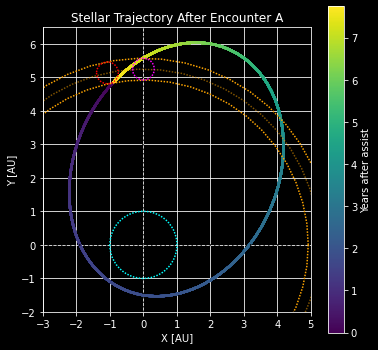

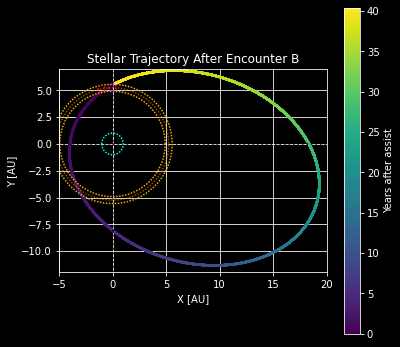

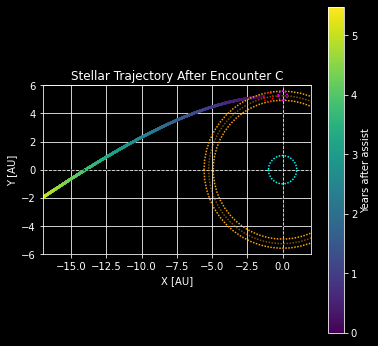

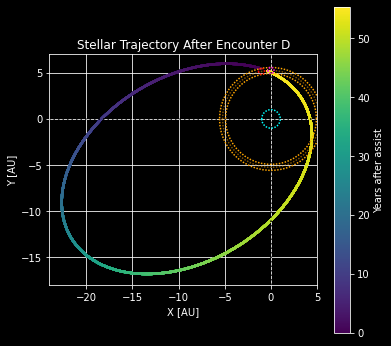

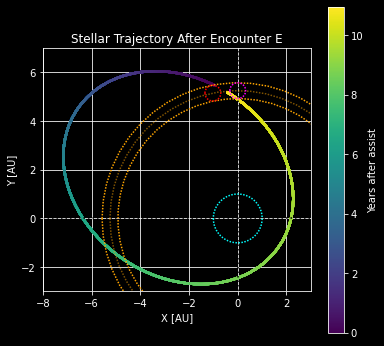

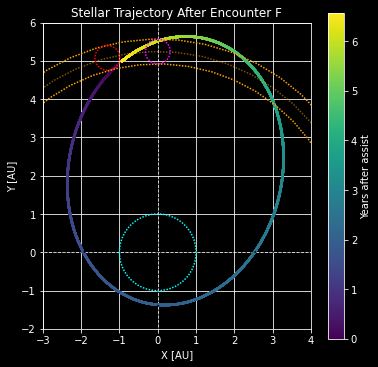

In [11]:
AU = 149597871000  # m

def model_2BP(state, t):
    mu = G * 1e-9 * M_star  # Gravitational parameter  [km^3/s^2]
    x, y, x_dot, y_dot = state
    x_ddot = -mu * x / (x**2 + y**2) ** (3 / 2)
    y_ddot = -mu * y / (x**2 + y**2) ** (3 / 2)
    return [x_dot, y_dot, x_ddot, y_ddot]

def plotline_sol(line, letter, lims=None, days=None):
    X_0 = assist.at[line, 'ax1'] * 1e-3                              # [m-->km]
    Y_0 = assist.at[line, 'ay1'] * 1e-3                              # [m-->km]
    VX_0 = (assist.at[line, 'vax'] + assist.at[line, 'vpx']) * 1e-3  # [m/s-->km/s]
    VY_0 = (assist.at[line, 'vay'] + assist.at[line, 'vpy']) * 1e-3  # [m/s-->km/s]
    state_0 = [X_0, Y_0, VX_0, VY_0]
    t = np.linspace(0, days * 24 * 3600, 100000) if not days==None else np.linspace(0, 1e3 * 24 * 3600, 100000)  # Simulate for a time period of 100 d

    # Solving ODE
    sol = odeint(model_2BP, state_0, t)
    x_sat, y_sat = sol[:, 0] * 1e3, sol[:, 1] * 1e3 # m
    vx, vy = sol[:, 2] * 1e3, sol[:, 3] * 1e3       # m/s
        
    # Create plot
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes()
        
    plt.axvline(0, c='k', dashes=(1, 2))
    plt.axhline(0, c='k', dashes=(1, 2))
    
    # Draw planet orbits and destination SOI bounds
    colors = ['orange', 'orange', 'orange', 'cyan']
    alphas = [.5, 1, 1, 1]
    for i, radius in enumerate([a_dest, (r_soi_dest + a_dest), (r_soi_dest - a_dest), a_home]):
        x_orbit = radius * np.cos(np.linspace(-np.pi, np.pi))
        y_orbit = radius * np.sin(np.linspace(-np.pi, np.pi))
        ax.plot(x_orbit / AU, y_orbit / AU, color=colors[i], alpha=alphas[i], dashes=(1, 1))
    
    # Draw initial SOI position
    x_soi = r_soi_dest * np.cos(np.linspace(-np.pi, np.pi)) + assist.at[line, 'px1']
    y_soi = r_soi_dest * np.sin(np.linspace(-np.pi, np.pi)) + assist.at[line, 'py1']
    ax.plot(x_soi / AU, y_soi / AU, color='r', dashes=(1, 1))

    # Draw departing SOI position
    x_soi = r_soi_dest * np.cos(np.linspace(-np.pi, np.pi))
    y_soi = r_soi_dest * np.sin(np.linspace(-np.pi, np.pi)) + a_dest
    ax.plot(x_soi / AU, y_soi / AU, color='magenta', dashes=(1, 1)) 
    
    # Plot predicted trajectory
    ax.scatter(x_sat / AU, y_sat / AU, c=t / (24 * 3600 * 365), s=2)
    p = ax.scatter(x_sat / AU, y_sat / AU, c=t / (24 * 3600 * 365), s=2)
    fig.colorbar(p, label='Years after assist')

    # Labels
    plt.title(f'Stellar Trajectory After Encounter {letter}')
    ax.set_xlabel('X [AU]')
    ax.set_ylabel('Y [AU]')

    # Window
    if lims == None:
        ax.set_xlim(-1e3, 1e3)
        ax.set_ylim(-1e3, 1e3)
    else:
        ax.set_xlim(lims[0], lims[1])
        ax.set_ylim(lims[2], lims[3])
    
    ax.set_axisbelow(True)
    ax.grid()
    plt.gca().set_aspect('equal')
    plt.show()

plotline_sol(10, "A", lims=[-3, 5, -2, 6.5], days=2825)
plotline_sol(11, "B", lims=[-5, 20, -12, 7], days=14750)
plotline_sol(12, "C", lims=[-17, 2, -6, 6], days=2000)
plotline_sol(13, "D", lims=[-24, 5, -18, 7], days=20200)
plotline_sol(15, "E", lims=[-8, 3, -3, 7], days=4000)
plotline_sol(2, "F", lims=[-3, 4, -2, 6], days=2400)
plt.show()
#12 might be best for positive assist (CCW)
#11 is CW

In [ ]:
# Notes: convert the angular displacement from initial position to the displaced position
# with coords of x0, y0 find x1, y1 in terms of x
# convert the approaching vx & vy to the departing vx & vy, know the x, y
flyby.loc[11, :]

In [ ]:
if

In [ ]:
# ORIGINAL CODE 
# Earth Model 
def model_2BP(state, t):
    mu = G * 1e-9 * M_dest  # Gravitational parameter  [km^3/s^2]
    x, y, z, x_dot, y_dot, z_dot= state
    x_ddot = -mu * x / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    y_ddot = -mu * y / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    z_ddot = -mu * z / (x ** 2 + y ** 2 + z ** 2) ** (3 / 2)
    return [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]

# Initial Conditions
line = 0
varphi = enc.at[line, 'varphi']
X_0 = r_soi_dest * np.cos(varphi) * 1e-3  # [km]
Y_0 = r_soi_dest * np.sin(varphi) * 1e-3  # [km]
Z_0 = 0                                   # [km]
VX_0 = enc.at[line, 'vx_rel'] * 1e-3      # [km/s]
VY_0 = enc.at[line, 'vy'] * 1e-3          # [km/s]
VZ_0 = 0                                  # [km/s]
state_0 = [X_0, Y_0, Z_0, VX_0, VY_0, VZ_0]

# Time Array
t = np.linspace(0, 180 * 24 * 3600, 2400)  # Simulates for a time period of 6

# Solving ODE
sol = odeint(model_2BP, state_0, t)
X_Sat = sol[:, 0]  # X-coord [km] of satellite over time interval 
Y_Sat = sol[:, 1]  # Y-coord [km] of satellite over time interval
Z_Sat = sol[:, 2]  # Z-coord [km] of satellite over time interval

# Setting up Spherical planet to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_dest = 7e4  # Average radius of Jupiter [km]
X_dest = r_dest * np.cos(phi) * np.sin(theta)
Y_dest = r_dest * np.sin(phi) * np.sin(theta)
Z_dest = r_dest * np.cos(theta)

# Plotting destination and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_dest, Y_dest, Z_dest, color='orange', alpha=0.7)
ax.scatter(X_Sat, Y_Sat, Z_Sat, c=t, s=10)

p = ax.scatter(X_Sat, Y_Sat, Z_Sat, c=t, s=10)
ax.view_init(90, 135)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]')

window=r_soi_dest*1e-3
ax.set_xlim3d(-window, window)
ax.set_ylim3d(-window, window)
ax.set_zlim3d(-window, window)
fig.colorbar(p)
plt.show()